## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a better understanding of what factors matter to the sales and improve the forthcoming sales strategy. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018 across 48 states in the US.
***

### Objective

In this project, we challenge ourselves: can we predict the profit in one of the states using the Superstore’s sales data?  

The aim is to analyze historical data and build a model to accurately predict the profit of the superstore. 
More importantly, we want to explore which is the most important factor driving the growth of the profit. 

 - To clean, organize and analyze the data,  and make sure it's well defined
 - To identify the relationships between feature
 - Train different models on the data
 - To assess the model performance and select the best model
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))
df.info()

The dataset contains: 9994 customers and 21 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17

## 3. Data Cleaning 

### 3.1 Check null/missing values

In [4]:
df.isnull().sum()
# - Data is very clean and no missing value is observed.

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
# df['City'].value_counts()
df['City'].nunique()

531

In [8]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [9]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
# Sub-Category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [11]:
df['Sub-Category'].nunique()

17

In [12]:
# unique customers - 793
df['Customer ID'].nunique()

793

In [13]:
df['Postal Code'].nunique()

631

 ### 3.2 check outliers

In [14]:
from sklearn.ensemble import IsolationForest

def detect_outliers(dataframe,contamination):
    
    cols = list(df.select_dtypes(['int64']).columns)+list(df.select_dtypes(['float64']).columns)
    model=IsolationForest(contamination=contamination)
    model.fit(df[cols])
    outliers = model.predict(dataframe[cols]) ==-1
    return outliers

In [15]:
# finding outliers considering 0.5% of contamination
contamination=0.005
index=detect_outliers(df,contamination)
row,col=df[index].shape
print("number of outliers: {}".format(row))

number of outliers: 50


In [16]:
# remove 50 outliers
df=df[index==False]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9944 non-null   int64  
 1   Order ID       9944 non-null   object 
 2   Order Date     9944 non-null   object 
 3   Ship Date      9944 non-null   object 
 4   Ship Mode      9944 non-null   object 
 5   Customer ID    9944 non-null   object 
 6   Customer Name  9944 non-null   object 
 7   Segment        9944 non-null   object 
 8   Country        9944 non-null   object 
 9   City           9944 non-null   object 
 10  State          9944 non-null   object 
 11  Postal Code    9944 non-null   int64  
 12  Region         9944 non-null   object 
 13  Product ID     9944 non-null   object 
 14  Category       9944 non-null   object 
 15  Sub-Category   9944 non-null   object 
 16  Product Name   9944 non-null   object 
 17  Sales          9944 non-null   float64
 18  Quantity

### 3.3 Drop undesired columns

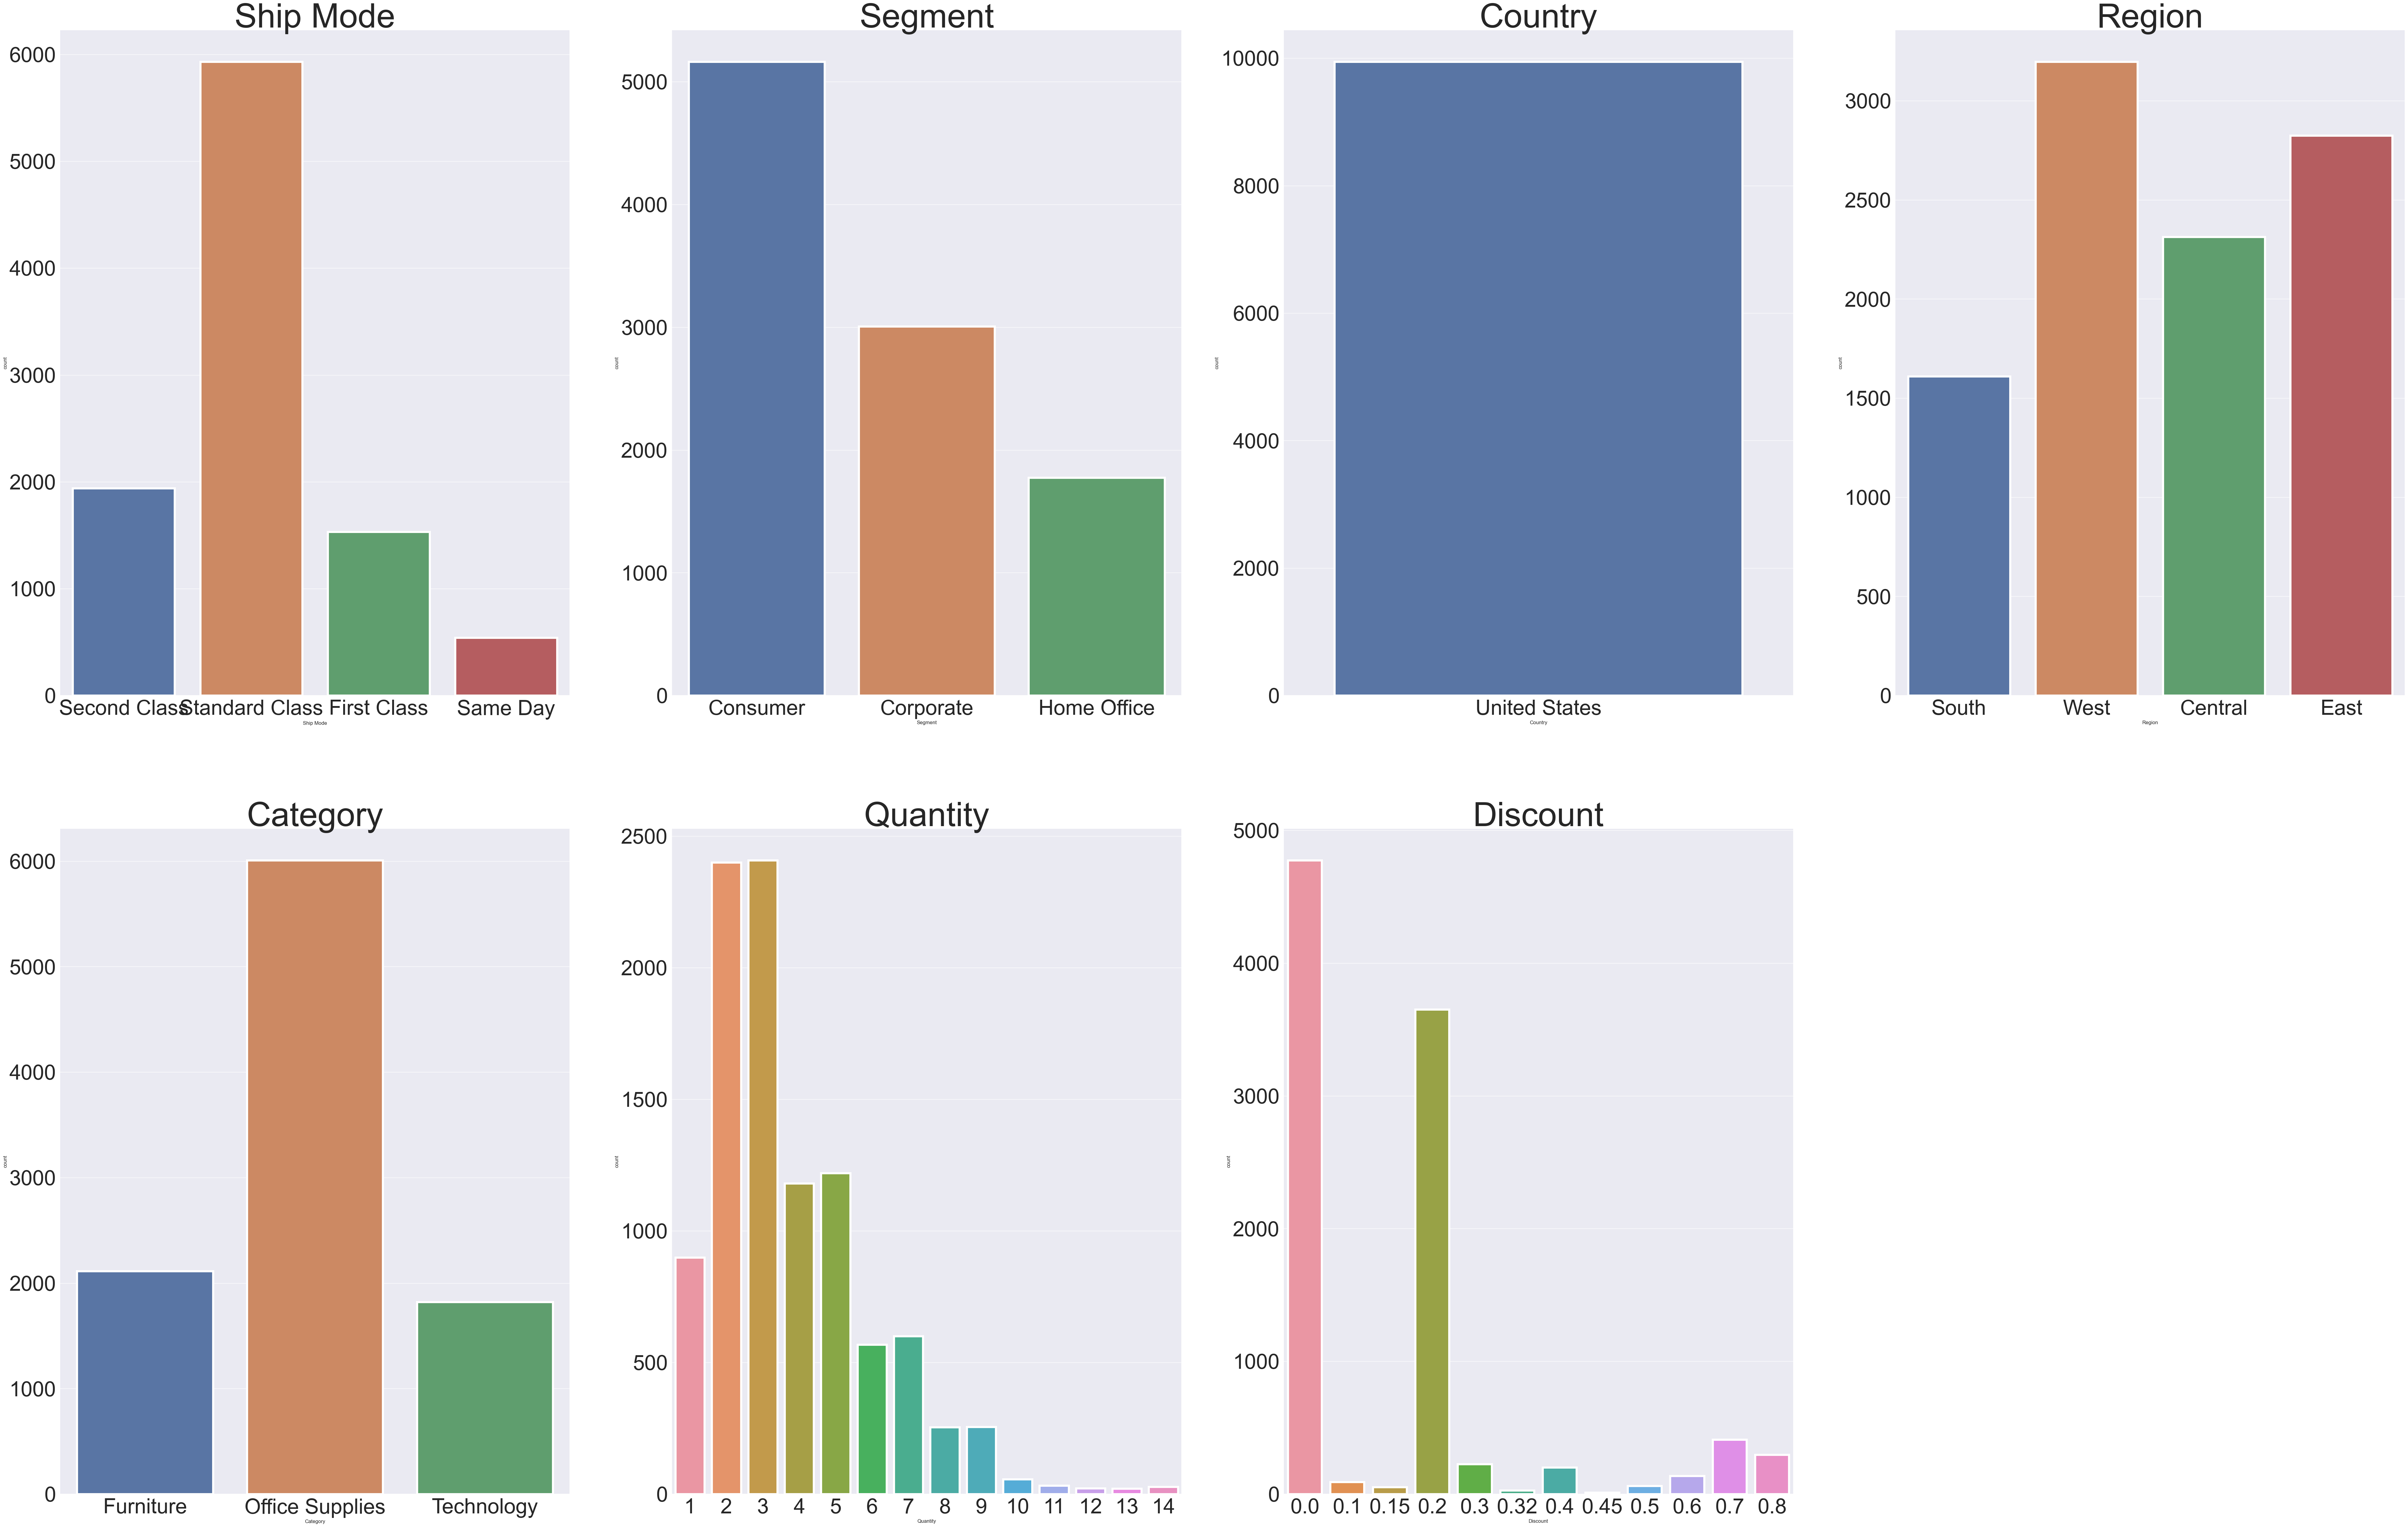

In [18]:
from math import ceil

def countplots(df,max_columns,val,figsize,title_size=20, title=""):
    leh=len(df.columns)
    rows=ceil(leh/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1
     
    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(rows,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks 
            plt.xticks(size=50)
            
    plt.show();
    
countplots(df,4,15,(100,200),80)    

In [19]:
# the dataset is only located in the US
# confirm with pandas .nunique
df['Country'].nunique()

1

In [20]:
# state - 49
df['State'].nunique()

49

In [21]:
# city -531
df['City'].nunique()

531

In [22]:
To_Drop = ['Row ID', 'Customer Name', 'Product ID', 'Country']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID','Customer Name', and 'Product ID' were dropped because they don't provide much predictive power in this case.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'Postal Code' was dropped.

### 3.4 Convert 'Order Date' and 'Ship Date' to 'datetime' objects instead of objects

In [23]:
df = df.rename(columns={'Ship Mode': 'ShipMode'})

In [24]:
df['Order Date'].unique()
# our sales data spans all the way from 01-03-2014 to 12-30-2017

array(['11/8/2016', '6/12/2016', '10/11/2015', ..., '6/3/2016',
       '4/12/2015', '1/21/2014'], dtype=object)

In [25]:
df['Order Date'].min()

'1/1/2017'

In [26]:
df['Order Date'].max()

'9/9/2017'

In [27]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [28]:
#df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Month'] = df['Order Date'].dt.month

In [29]:
# sort
df = df.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

## 4. EDA

### 4.1  Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

#### ANOVA test

ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of categorical variables. Use a ANOVA when you want to know how independent variables, in combination, affect a dependent variable.

F-statistic: Variation between sample means / Variation within samples; the larger the F-statistic, the greater the evidence that there is a difference between the group means.

In [30]:
#check the effect of categorical variable on our target variable 'profit'
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

cols=['ShipMode', 'Segment','Region','Category','Quantity','Discount']

for item in cols:
    model=ols('Profit ~ {}'.format(item),data=df).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    print(anova_result)
    print()

                sum_sq      df         F    PR(>F)
ShipMode  6.641696e+04     3.0  1.551465  0.198997
Residual  1.418411e+08  9940.0       NaN       NaN

                sum_sq      df        F    PR(>F)
Segment   1.219721e+05     2.0  4.27591  0.013925
Residual  1.417855e+08  9941.0      NaN       NaN

                sum_sq      df          F        PR(>F)
Region    5.581552e+05     3.0  13.083571  1.593340e-08
Residual  1.413493e+08  9940.0        NaN           NaN

                sum_sq      df           F        PR(>F)
Category  3.419521e+06     2.0  122.730705  2.218959e-53
Residual  1.384880e+08  9941.0         NaN           NaN

                sum_sq      df           F        PR(>F)
Quantity  1.556805e+06     1.0  110.279143  1.159451e-25
Residual  1.403507e+08  9942.0         NaN           NaN

                sum_sq      df            F         PR(>F)
Discount  1.411241e+07     1.0  1097.894727  1.850876e-228
Residual  1.277951e+08  9942.0          NaN            NaN



- Mean deviation of 'Profit'

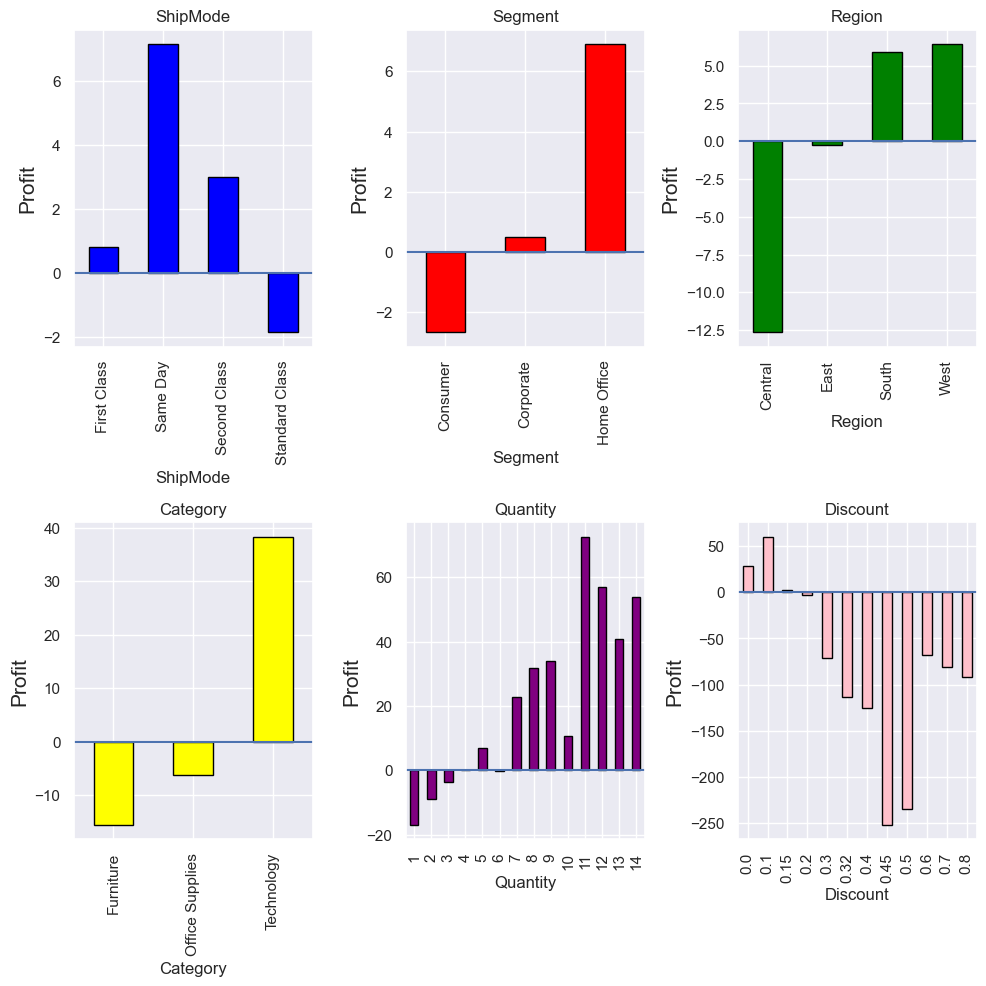

In [31]:
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    mot=df[target].mean()
    fig=plt.figure(figsize=size)
    leh=len(cols)
    rows=ceil(leh/maxcol)
    i=1
    for item in cols:
        plt.subplot(rows,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].mean()-mot).plot(kind='bar',color=palette[i-1],edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    fig.tight_layout(pad=1.0)
    plt.savefig('images/anova.png')
    plt.show();

mean_dev(df,'Profit',3,['ShipMode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(10,10))

Based on 'profit' mean deviations, an ANOVA testing F-values show:

 - Discount : according to mean profit deviations the higher profit is generated with 10% discount then is decreasing for the 15-50% range; the worst profit is in the range of 45-55% discount.
 
 - Quantity : the mean of profit evolves increasingly with the number of products the customers ordered, the smallest number corresponds to the lowest profit.
 
 - Category: according to profit deviations, 'Technology' products generated more profit.
  
 - 'Region': according to the deviations from different regions, 'West' Region tends to generate more profit.
  
 - 'Segment', 'Ship Mode': according to the small F-values, they are less likely to make significant difference on 'profit'.  

#### remove outliers of Sales

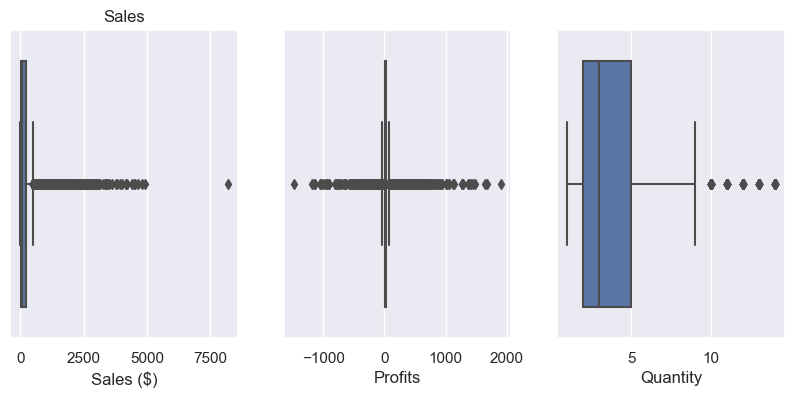

In [32]:
# before the cleaned data
fig, axs = plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')

plt.subplot(1,3,2)
sns.boxplot(x=df['Profit'])
plt.xlabel('Profits')

plt.subplot(1,3,3)
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.savefig('images/pie.png')
plt.show();

In [33]:
# remove 'Sales' outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df['Sales'] >= q1 -1.5 *IQR) & (df['Sales'] <= q3 + 1.5 *IQR)
df = df.loc[filter]
df.shape

(8809, 18)

In [34]:
# remove 'Profit' outliers
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df['Profit'] >= q1 -1.6 *IQR) & (df['Profit'] <= q3 + 1.6 *IQR)
df = df.loc[filter]
df.shape

(7456, 18)

In [35]:
# remove 'quantity' outliers
df.drop(df[df['Quantity']>7].index, inplace=True)
df.shape

(7102, 18)

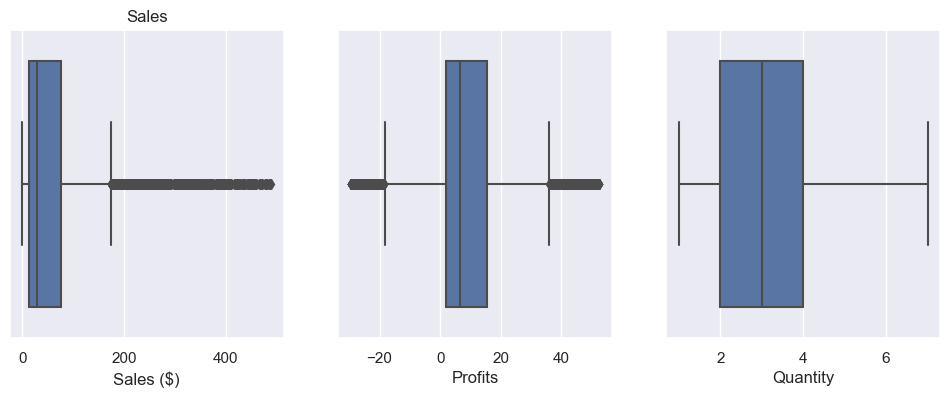

In [36]:
# plot the cleaned data
fig, axs = plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')

plt.subplot(1,3,2)
sns.boxplot(x=df['Profit'])
plt.xlabel('Profits')

plt.subplot(1,3,3)
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.savefig('images/pie.png')
plt.show();

#### Sales/Profit per State

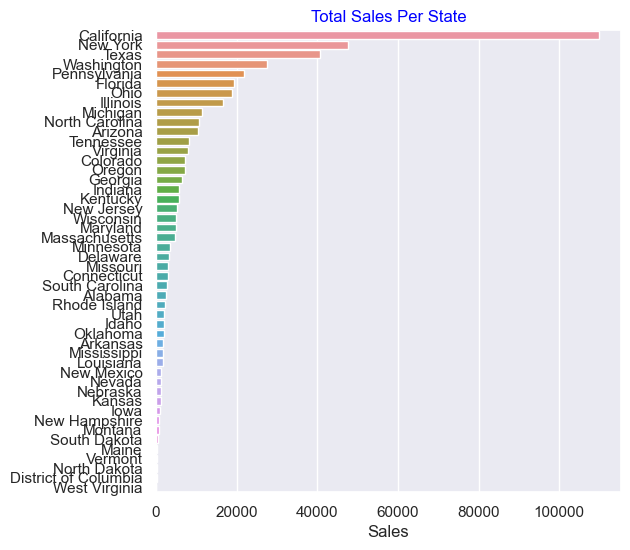

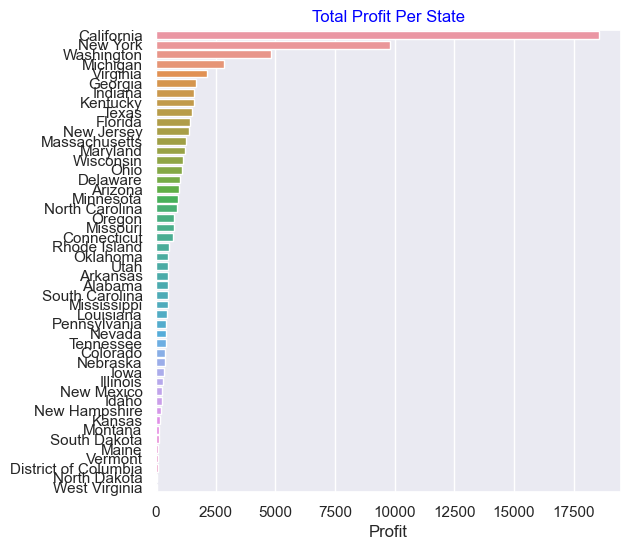

In [78]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,6))
    sum_df = df.groupby(by=['State'])[col].sum()
    sum_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=sum_df.index, x=sum_df, ax=ax)
    ax.set_title(f'Total {col} Per State') 
    ax.set_ylabel('')
    plt.savefig(f'images/sum_state_{col}.png')
    plt.show();

#### Sales/Profit per Region

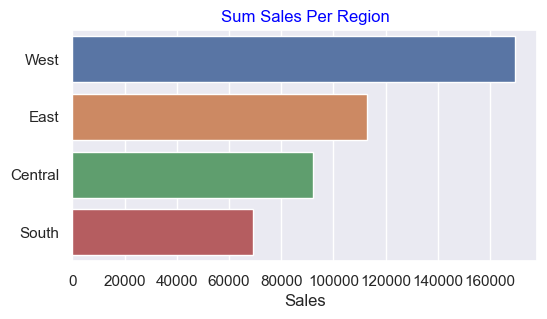

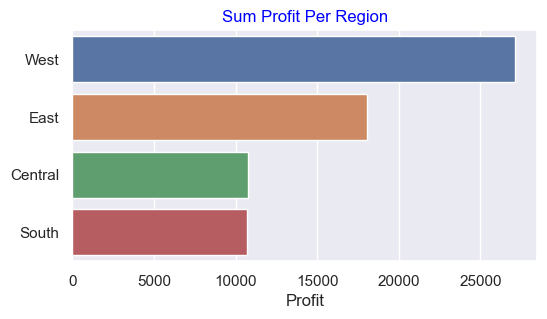

In [77]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    sum_df2 = df.groupby(by=['Region'])[col].sum()
    sum_df2.sort_values(inplace=True,ascending=False)
    sns.barplot(y=sum_df2.index, x=sum_df2, ax=ax)
    ax.set_title(f'Sum {col} Per Region') 
    ax.set_ylabel('')
    plt.savefig(f'images/sum_reg_{col}.png')
    plt.show();

#### Sales/Profit per Segment

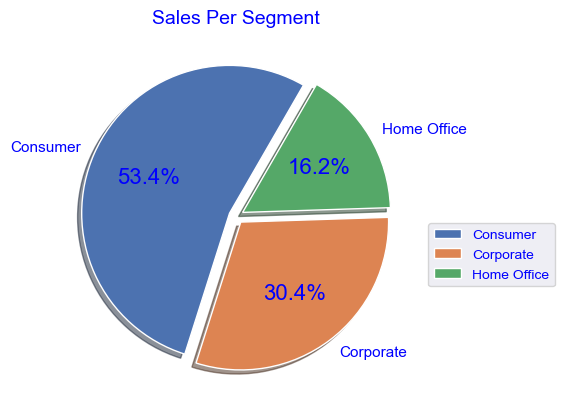

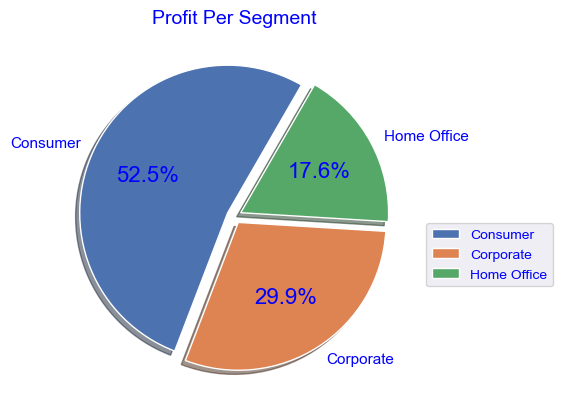

In [75]:
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    segments = list(df.groupby('Segment')[col])
    seg_dict = {}
    for i in range(len(segments)):
        num = sum(segments[i][1])
        seg_dict[str(segments[i][0])] = num
    df_seg = pd.DataFrame.from_dict(seg_dict, orient='index', columns=[col]).reset_index()
    df_seg.columns = ['Segment', col]
    labels = df_seg['Segment']
    values = df_seg[col]
    plt.rcParams['text.color'] = 'blue'
    plt.rcParams['font.size'] = 16
    explode = (0.05, 0.05, 0.05)
    pie = plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=60)
    plt.title(f'{col} Per Segment', fontsize=14) 
    plt.ylabel('')
    plt.legend(pie[0], labels, bbox_to_anchor = (1,0.5), fontsize=10)
    plt.savefig(f'images/sum_seg_{col}.png')
    plt.show();
#labeldistance = 1.3,pctdistance = 1.15

#### Sales/Profit per Category

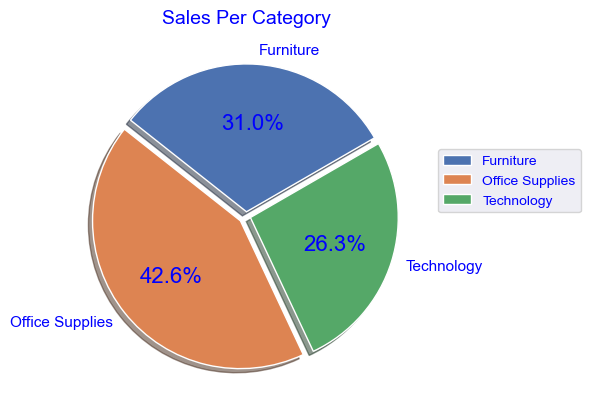

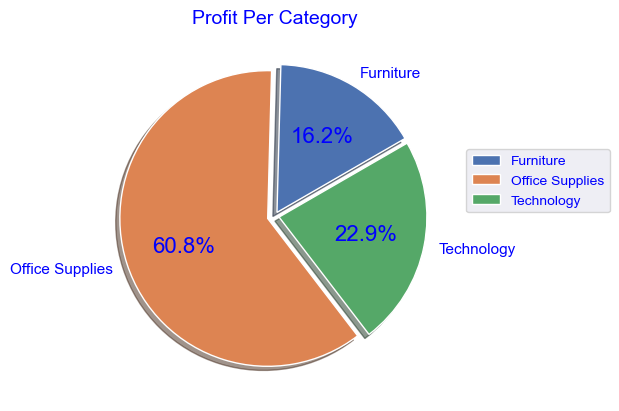

In [74]:
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    cats = list(df.groupby('Category')[col])
    cat_dict = {}
    for i in range(len(segments)):
        num = sum(cats[i][1])
        cat_dict[str(cats[i][0])] = num
    df_cat = pd.DataFrame.from_dict(cat_dict, orient='index', columns=[col]).reset_index()
    df_cat.columns = ['Category', col]
    labels = df_cat['Category']
    values = df_cat[col]
    plt.rcParams['text.color'] = 'blue'
    plt.rcParams['font.size'] = 16
    explode = (0.03, 0.05, 0.03)
    pie = plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=30)
    plt.title(f'{col} Per Category', fontsize=14) 
    plt.ylabel('')
    plt.legend(pie[0], labels, bbox_to_anchor = (1,0.7), fontsize=10)
    plt.savefig(f'images/sum_cat_{col}.png')
    plt.show();

#### Top 10 states in total sales

In [41]:
# 
state_total_sales = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Sales)
    state_total_sales[state] = total

df_state_total_sales = pd.DataFrame.from_dict(state_total_sales, orient='index', columns=['total_sales'])

df_state_total_sales = df_state_total_sales.sort_values(by='total_sales', ascending=False)
#df_state_total_sales.columns = ['State', 'total_sales']
df_state_total_sales.columns = ['total_sales']
df_state_total_sales[:10]

total_sales
California      109756.2515
New York         47569.4580
Texas            40587.3514
Washington       27517.1780
Pennsylvania     21934.0240
Florida          19360.0490
Ohio             18781.4710
Illinois         16620.5420
Michigan         11498.6970
North Carolina   10722.2510

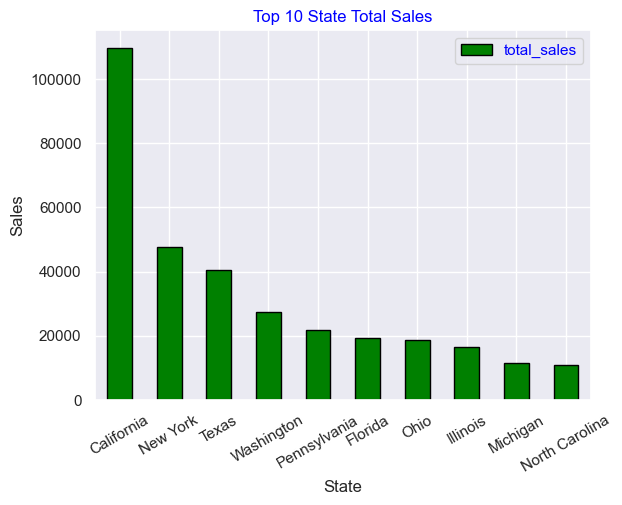

In [86]:
# top 10 states in sales
df_state_total_sales[:10].plot(kind='bar', color='green', edgecolor='Black')
plt.title('Top 10 State Total Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.savefig('images/top10_state1.png')
plt.show();

#### Top 10 states in profits 

In [43]:
state_total_profits = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Profit)
    state_total_profits[state] = total

df_state_total_profits = pd.DataFrame.from_dict(state_total_profits, orient='index', columns=['total_profits'])

df_state_total_profits = df_state_total_profits.sort_values(by='total_profits', ascending=False)
df_state_total_profits.columns = [ 'total_profits']
df_state_total_profits.head(10)

total_profits
California     18543.4636
New York        9823.1160
Washington      4819.2610
Michigan        2870.4950
Virginia        2142.2167
Georgia         1700.1905
Indiana         1609.6408
Kentucky        1580.7499
Texas           1512.2616
Florida         1448.1108

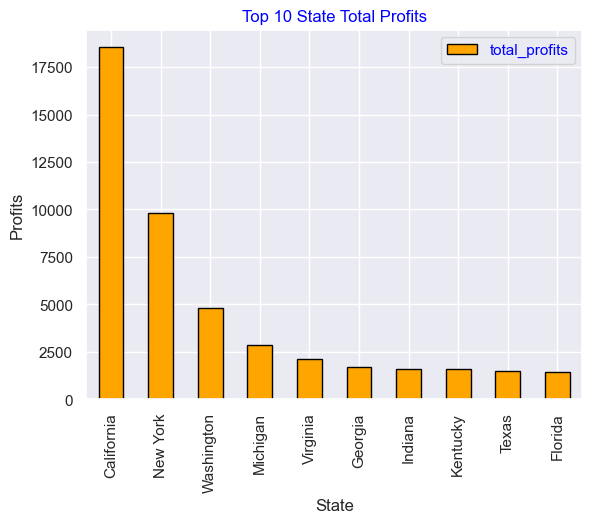

In [79]:
# # top 10 states in profits
df_state_total_profits[:10].plot(kind='bar', color='orange', edgecolor='Black')
plt.title('Top 10 State Total Profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.savefig('images/top10_state2.png')
plt.show();

# top 1 state: california the most densely populated state

#### Top 10 cities in total sales

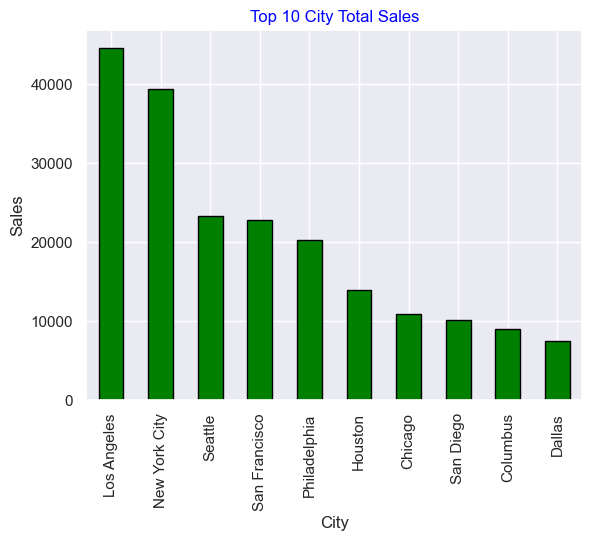

In [80]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='green',edgecolor='Black')
plt.title('Top 10 City Total Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.savefig('images/top10_city1.png')
plt.show();

#### Top 10 cities in total Profit

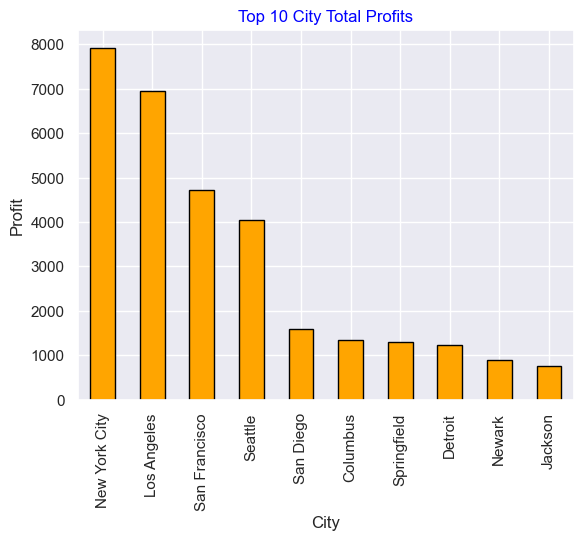

In [81]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='orange',edgecolor='Black')
plt.title('Top 10 City Total Profits')
plt.xlabel('City')
plt.ylabel('Profit')
plt.savefig('images/top10_city2.png')
plt.show();

# top 1 city: New york - very densely populated city

#### Profits vs Region

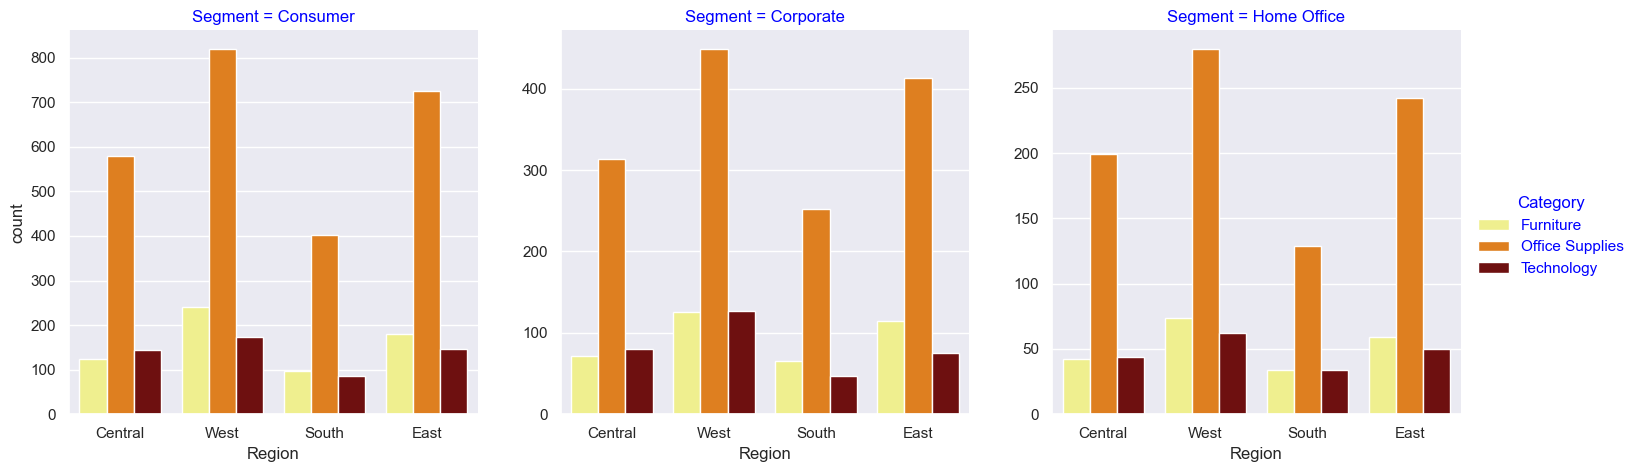

In [47]:
# total profit
sns.catplot(x='Region', hue='Category',  col='Segment', data=df, kind="count", 
                estimator=lambda : len(x) / len(df) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_total.png')
plt.show();

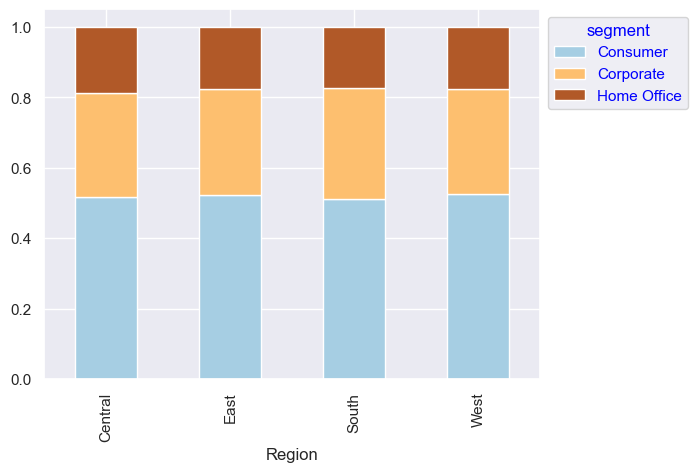

In [48]:
# positive profit
df_pos_profit = df[df['Profit']>0].sort_values('Profit')

by_pos_profit = df_pos_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_pos_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

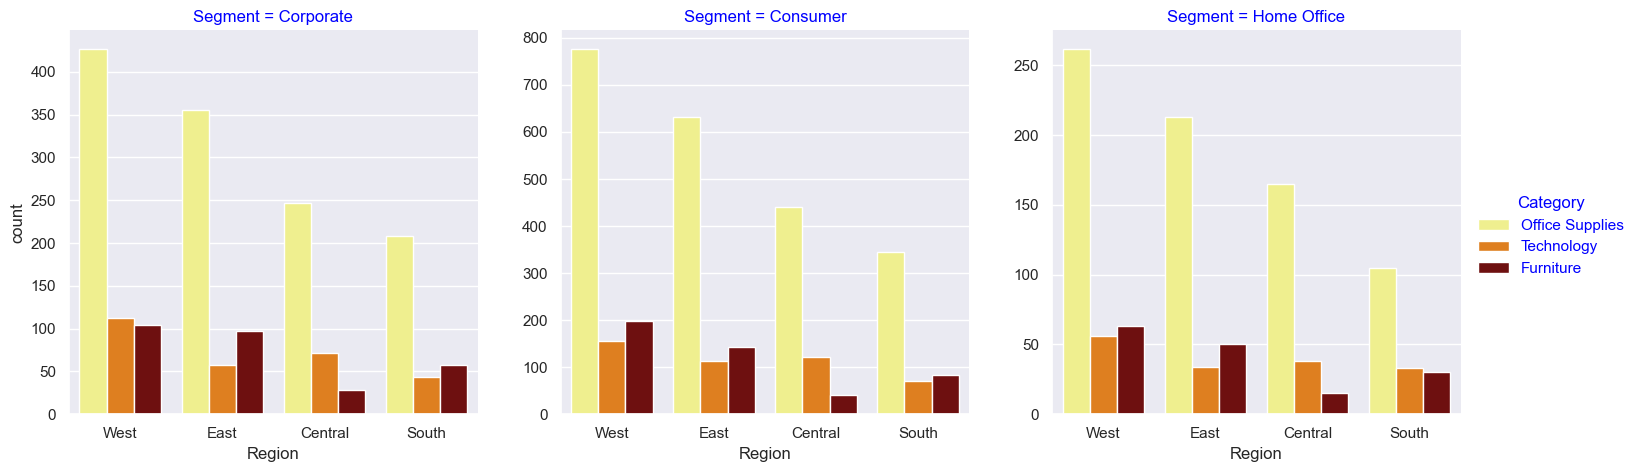

In [49]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_pos_profit, kind="count", 
                estimator=lambda : len(x) / len(df_pos_profit) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_pos.png')
plt.show();
# obervation: 'office supplies' has the largest amount of orders across all the region.

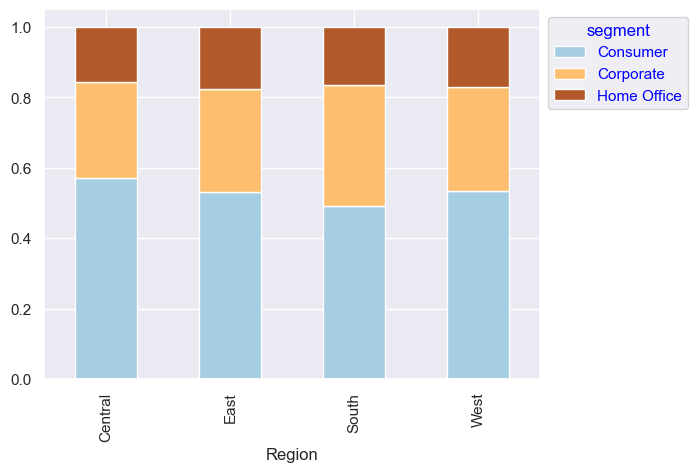

In [50]:
# negative profit
df_neg_profit = df[df['Profit']<0].sort_values('Profit')

by_neg_profit = df_neg_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_neg_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

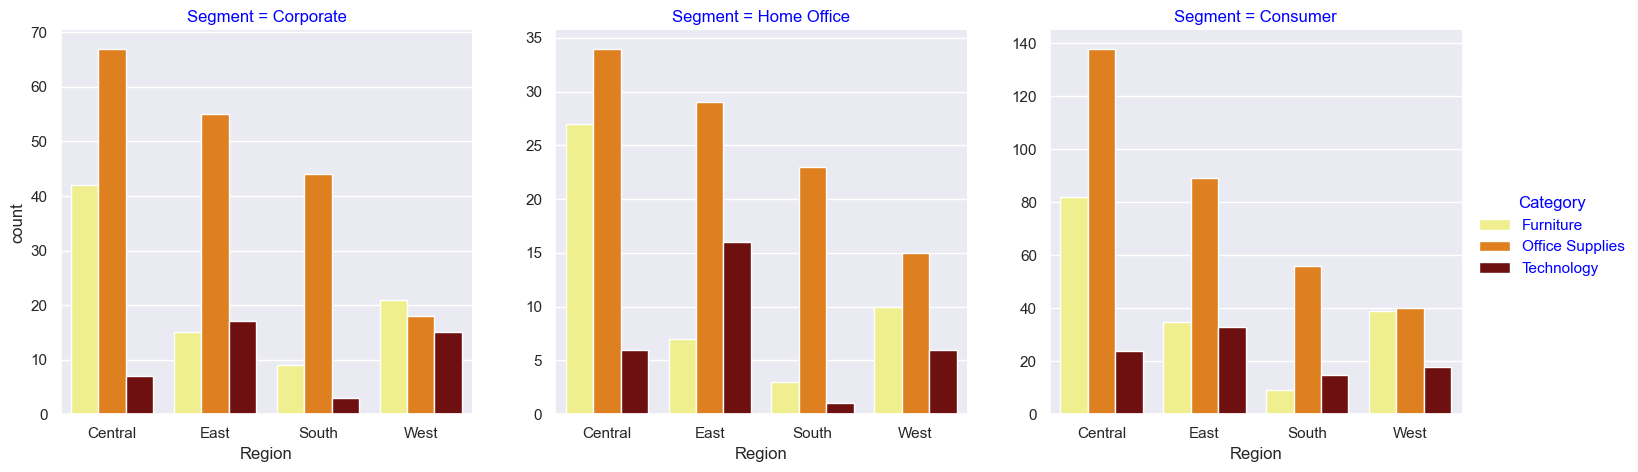

In [51]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_neg_profit, kind="count", 
                estimator=lambda : len(x) / len(df_neg_profit) * 100, sharey=False, palette="afmhot_r")
plt.show();
#  Most negative profit came from in the central region. Need to break down this region ...

In [52]:
# break down the Central region
df_Central = df_neg_profit[df_neg_profit['Region'] == 'Central'].groupby('State').Category.value_counts(normalize=True).unstack()
df_Central.head()
# neg profit mainly came from 'Texas' and 'Illinois'

Category  Furniture  Office Supplies  Technology
State                                           
Illinois   0.368794         0.553191    0.078014
Texas      0.346154         0.562937    0.090909

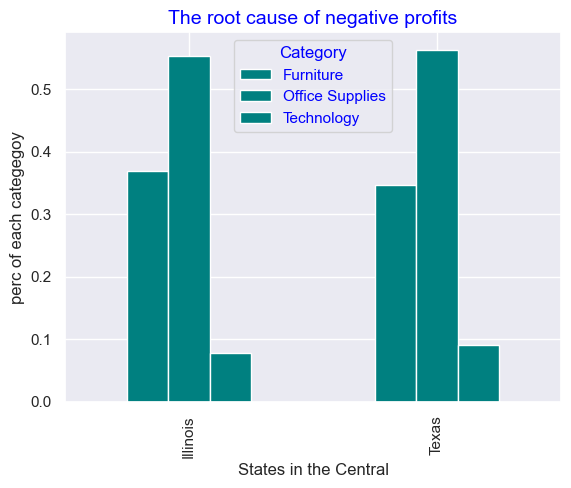

In [53]:
plt.figsize=(6,6)
df_Central.plot(kind='bar', color='teal')
plt.xlabel('States in the Central')
plt.ylabel('perc of each categegoy')
plt.title('The root cause of negative profits', fontsize=14)
plt.savefig('images/profit_2states.png')
plt.show();

 - the number of orders increased from 2014 to 2017.
 - 'Sales' has a skewed, right tailed distribution with a range from 0.44 to 496.86.

### 4.2 Grouped sales data

####  adding sales per customer

In [54]:
a = df.groupby('Customer ID')['Sales'].mean().reset_index()
a.columns = ['Customer ID', 'sales_per_customer']

In [55]:
add_a = df.merge(a, how='inner', on='Customer ID')

####  adding sales per city

In [56]:
b = add_a.groupby('City')['Sales'].mean().reset_index()
b.columns = ['City', 'sales_per_city']

In [57]:
add_b = add_a.merge(b, how='inner', on='City')

In [58]:
df_combined = add_b.dropna()

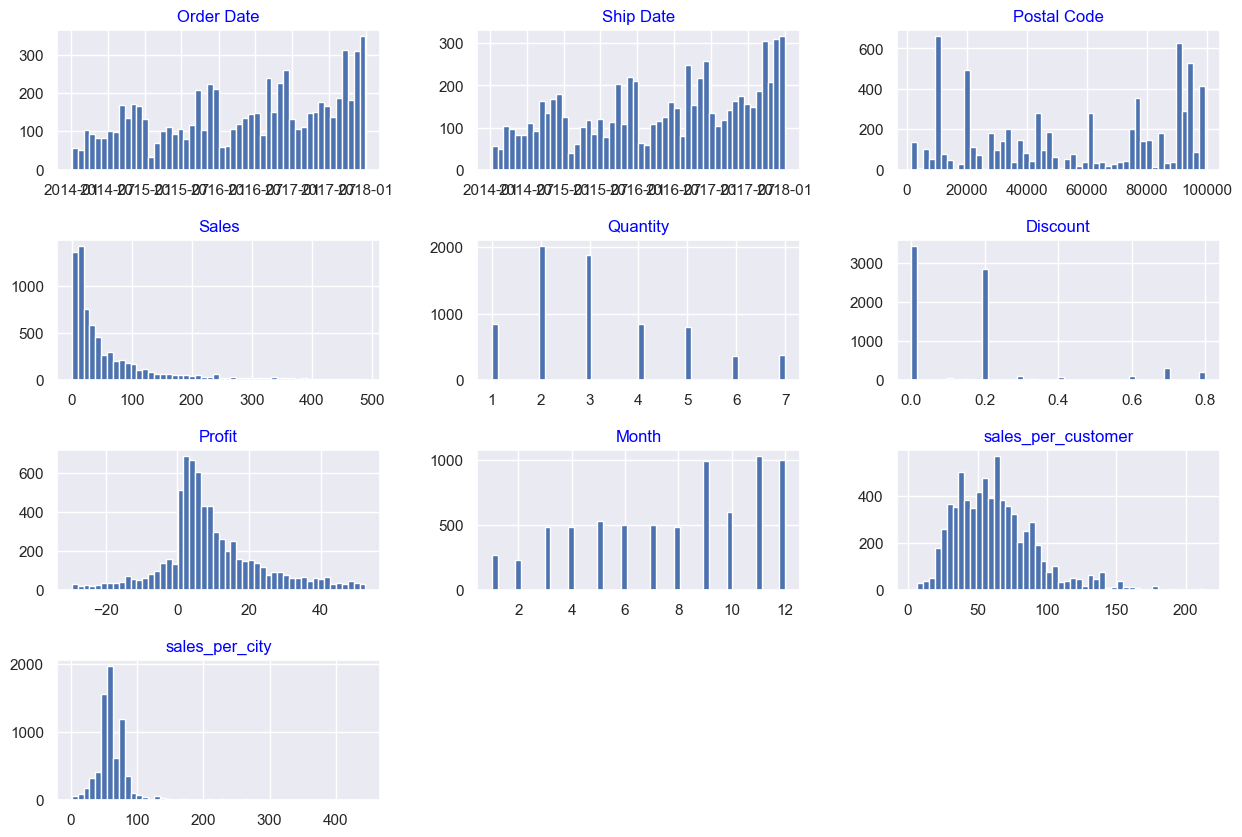

In [59]:
# plot histograms of each of the numeric features
df_combined.hist(figsize=(15,10), bins=50)
plt.subplots_adjust(hspace=0.5)
plt.show();

### 4.3 Categorical features

In [60]:
# Let's select the columns of the train set with numerical data
df_combined_cat = df_combined.select_dtypes(exclude=["float64", "int64", "datetime64[ns]"])
df_combined_cat.head()

Order ID        ShipMode Customer ID   Segment        City  \
0  CA-2014-124723  Standard Class    GZ-14470  Consumer  Texas City   
1  CA-2015-141250  Standard Class    PM-18940  Consumer  Texas City   
2  CA-2015-141250  Standard Class    PM-18940  Consumer  Texas City   
3  CA-2015-123141  Standard Class    GZ-14470  Consumer  Rio Rancho   
4  CA-2017-156769     First Class    GZ-14470  Consumer   Arlington   

        State   Region         Category Sub-Category  \
0       Texas  Central        Furniture       Tables   
1       Texas  Central        Furniture       Chairs   
2       Texas  Central        Furniture       Tables   
3  New Mexico     West        Furniture       Chairs   
4    Virginia    South  Office Supplies          Art   

                                        Product Name  
0  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...  
1     Harbour Creations 67200 Series Stacking Chairs  
2  Bevis Round Conference Table Top & Single Colu...  
3                 Global Deluxe Office Fabric Chairs  
4        Dixon Ticonderoga Core-Lock Colored Pencils

##### bar plots

In [61]:
df_cat = df_combined_cat[['ShipMode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Product Name']]

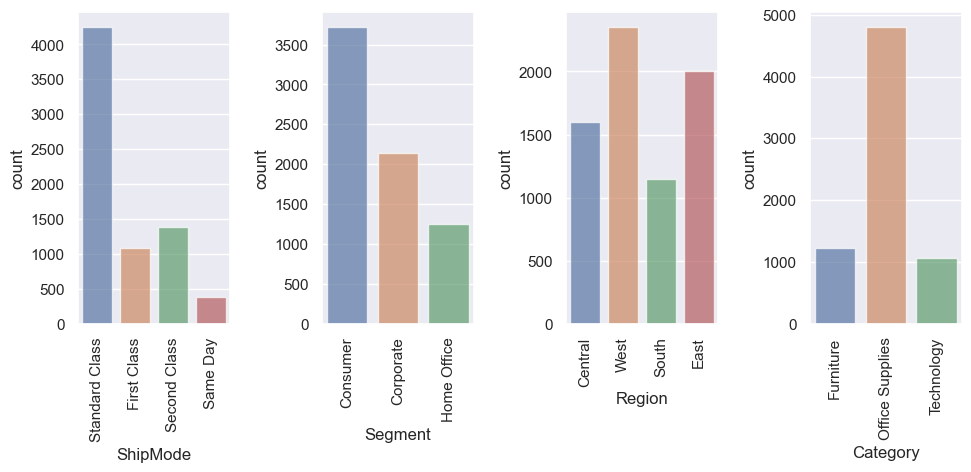

In [62]:
# Countplot for each of the categorical features
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# plot barplot of each feature
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)
        
fig.tight_layout()     
plt.show();

**Highlights:**
 
 - Ship mode: standard class is the most often used shipping method
 - Segment: the total orders from consumers is dominant
 - Region: West and East regions have higher amount of sold items 

##### box plots

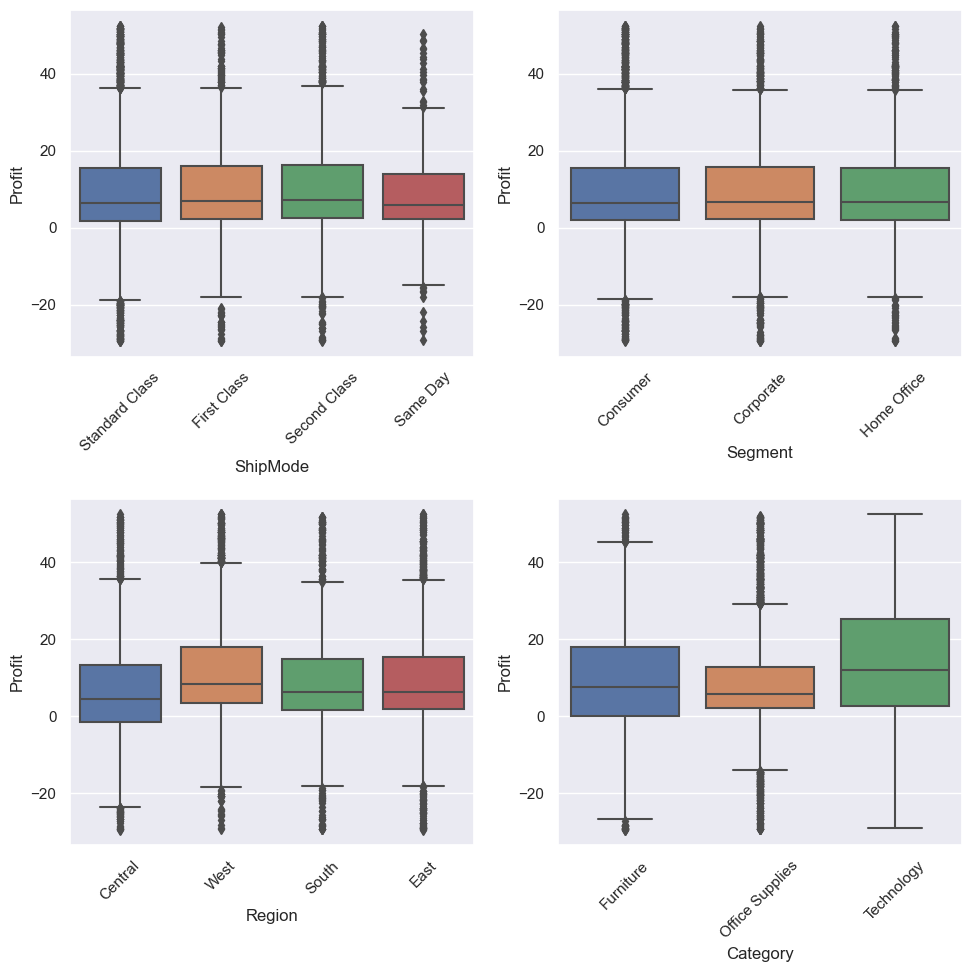

In [63]:
# With the boxplot we can see the variation of the target 'profit' in each of the categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot the variation of Sales in each feature
for i, ax in enumerate(fig.axes):

    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x=df_cat.columns[i], y="Profit", data=df_combined, ax=ax)

fig.tight_layout()
plt.show();

**Visualize the impact of each feature on 'Profit':**

 - Region: West region has highest amount of profits than others.
 - Category: products of 'Technology' have generated largest amount of profit.
 - Ship mode and 'Segment': less variant

### 4.4 Bivariate analysis

The analysis between a dependent variable and an independent variable to uncover the relationship between them.
#### Feature correlation heatmap

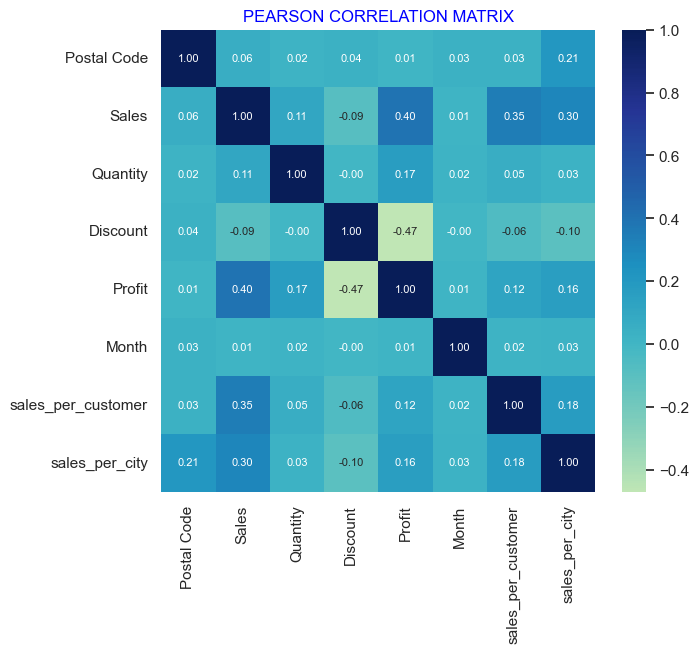

In [64]:
# find relations between two variables
plt.subplots(figsize=(7,6))
sns.heatmap(df_combined.corr(), center=0, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 8})
plt.title('PEARSON CORRELATION MATRIX', fontsize=12)
plt.savefig('images/heatmap.png')
plt.show();

**Questions of interests:**
From correlation table, we get a sense of the most important features to the profits. We can see 'Discounts' becomes the MOST important contributor to profit.
 
 - 'Discount' has a bigger negative relationship with the 'Profit' and little relationship with 'quantity'.
 - 'Sale','Quantity' and 'sales_per_order' are positively correlated with 'Profit'.

#### Scatter plots of numeric features against profit
Like heatmap, a pair plot and scatter plot are also used to observe linear relations between two variables in a dataset.

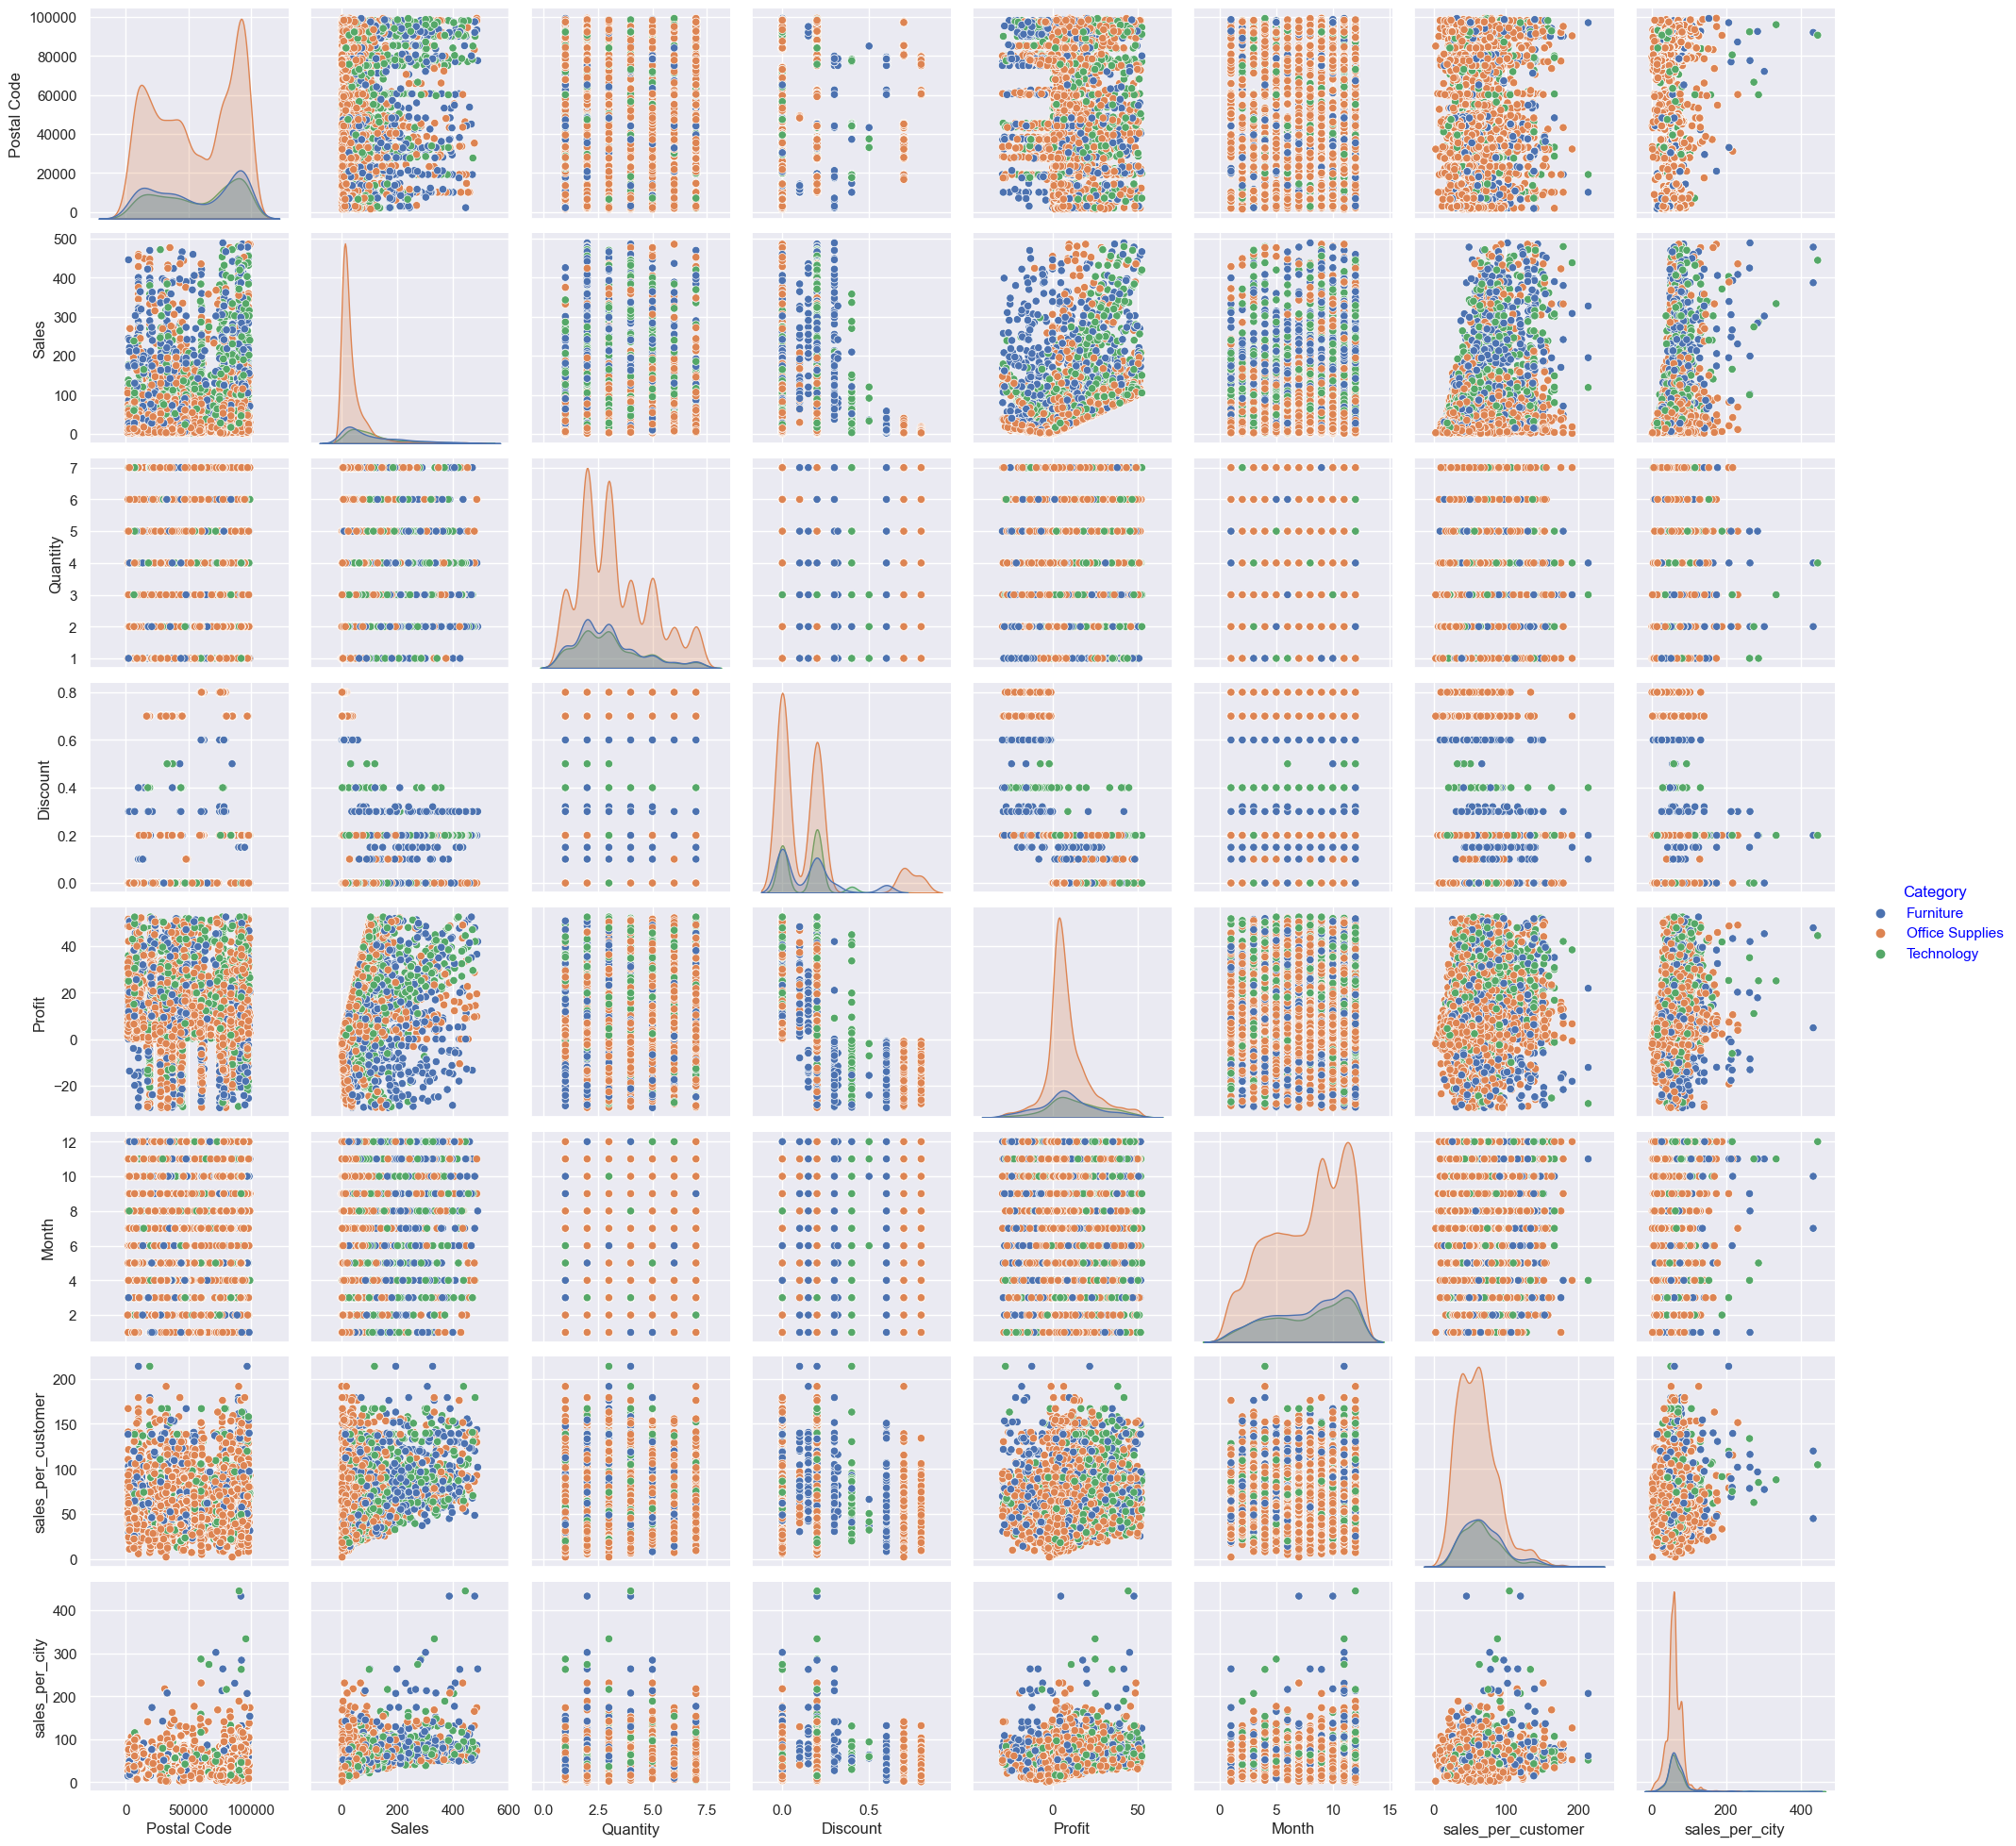

In [65]:
# pd.plotting.scatter_matrix(df_combined, figsize=(15, 15), s=150, marker='.')
sns.pairplot(df_combined, hue='Category')
plt.show();
# we can see correlations between sales/profit, profit/discount, total sales/total population

## 5. Text analytics

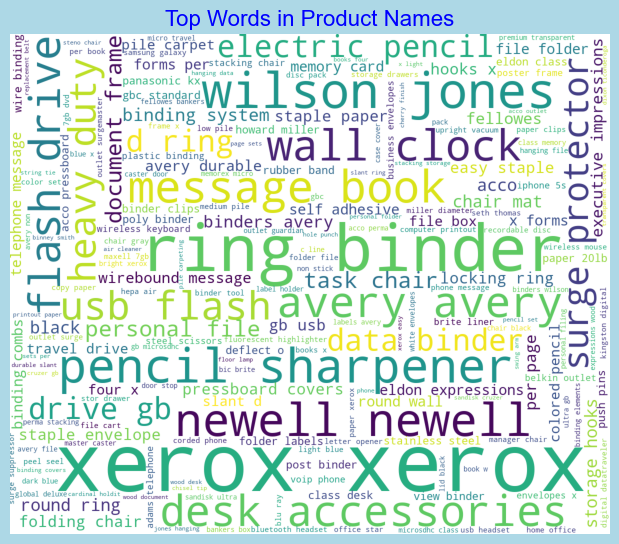

In [66]:
# use wordcloud to visualize which words are heavily involved in all the sales
product_names = ' '.join(df['Product Name'].str.lower().values)

from wordcloud import WordCloud , STOPWORDS
wordcloud = WordCloud(width=1200, height=1000, margin=0, background_color='white', stopwords=STOPWORDS, min_font_size = 10).generate(product_names)

# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = 'lightblue')
plt.imshow(wordcloud)
plt.title('Top Words in Product Names', fontsize=16)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('images/text_product.png')
plt.show();

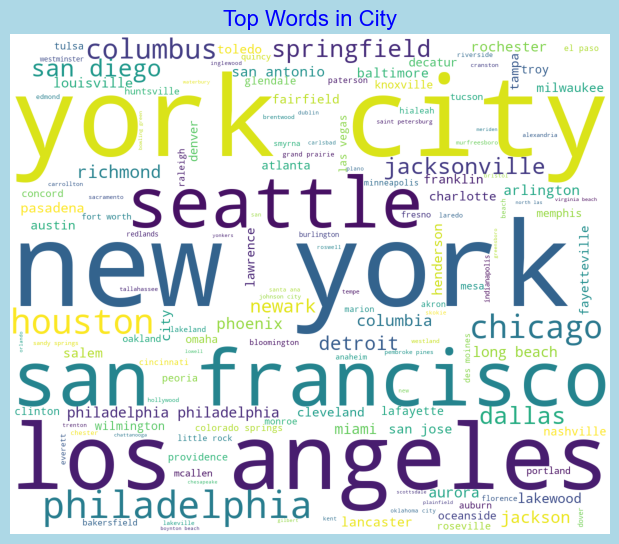

In [67]:
# use wordcloud to visualize which words are heavily involved in all the sales
product_names = ' '.join(df['City'].str.lower().values)

from wordcloud import WordCloud , STOPWORDS
wordcloud = WordCloud(width=1200, height=1000, margin=0, background_color='white', stopwords=STOPWORDS, min_font_size = 10).generate(product_names)

# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = 'lightblue')
plt.imshow(wordcloud)
plt.title('Top Words in City', fontsize=16)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('images/text_city.png')
plt.show();

Through the wordcloud generated images, we can see:

 - **"xerox" and "ring binder"** are the two most important words that were repeatedly mentioned in the product names. This is not very surprising since we found out 'office supplies' has the largest volumes of orders. 
 - Two band names that stand out from this analysis are **"newell" and "wilson jones'**,  Newell Brands is an American worldwide manufacturer of consumer and commercial products with a portfolio of brands including: Rubbermaid storage, home organization and writing instruments, etc. Wilson Jones is the inventor and supplier of the three ring binder.
 - **'New York'** in the east region, **'Los Angles' and ' San Francisco'** in the west region are the top three most important cities. It makes sense because they are the cities with large amount of sales of products. 

## 6. Save data

In [68]:
df_clean = df_combined.drop(['Order Date', 'Ship Date', 'Product Name', 'Postal Code'], axis=1)

In [69]:
print("The clean dataset has {} rows and {} columns.".format(df_clean.shape[0], df_clean.shape[1]))

The clean dataset has 7102 rows and 16 columns.


In [70]:
# save the state_summary separately.
datapath = './data'
save_file(df_clean, 'clean_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\clean_data.csv"


## 7. Summary

In this notebook, the thorough EDA includes:

- Check null/missing values
- Remove outliers
- Drop less useful columns
- Convert 'date and time' objects to the datetime data type

Feature engineering to extract more information and add features:
- add: sales per customers per order

Visualization:
- Break down the sales data, visualize 'sales', 'discounts', 'quantity', and their relations with the target variable 'profit'

Think about what key factors drive the profit?    